# Logestic resgression

In [14]:
#Assumptions

In [34]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split



In [16]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
df.isnull().sum().sort_values(ascending =False) 

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [18]:
#Presprosses the data
df.drop('deck', axis=1, inplace=True)

#Impute the missing values

df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace= True)

df['embarked'].fillna(df['embarked'].mode(), inplace= True)
df['embark_town'].fillna(df['embark_town'].mode(), inplace= True)

In [24]:
#encode the categorical variables using for loop 
le=LabelEncoder()

for col in df.columns:
    if df[col].dtypes=='object' or df[col].dtypes=='category': #check the data type of the column 
        df[col]=le.fit_transform(df[col]) #encode the column 
 

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [26]:
# X and y values

X=df.drop('survived', axis=1) #independent columns X is equal to all columns except survived
y=df['survived']

In [48]:
#now spliting the data 
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2 , random_state=42)

In [49]:
#model selection
lg_model=LogisticRegression()

In [50]:
#training the model
lg_model.fit(X_train, y_train)

c:\Users\HP\miniconda3\envs\ml_python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
#predicting the model
y_pred=lg_model.predict(X_test)

In [52]:
#checking the accuracy score
print(' Accuracy Score:' ,accuracy_score(y_test, y_pred))

#checking the recall score
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)

#checking the precision score
print(' Precision Score:' ,precision_score(y_test, y_pred))

#checking the f1 score
print(' F1 Score:', f1_score(y_test, y_pred))


#checking the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#checking the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy Score: 1.0
Recall Score: 1.0
 Precision Score: 1.0
 F1 Score: 1.0
Confusion Matrix:
 [[105   0]
 [  0  74]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



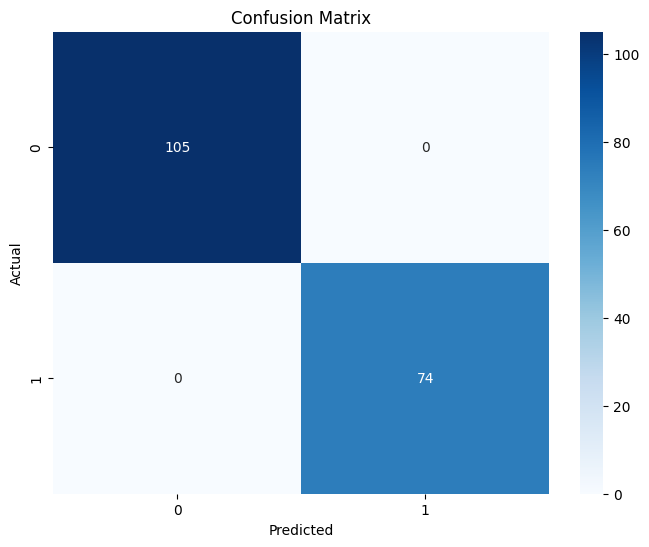

In [57]:
#plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues') #annot=True to annotate cells 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
#save the model using pickle
import pickle

# Save the model using pickle
pickle.dump(lg_model, open('./save_models/lg_model.pkl', 'wb'))

In [55]:
#load the model
import pickle

# Load the model
model = pickle.load(open('./save_models/lg_model.pkl', 'rb'))

In [56]:
lg_model.predict(X_test)

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)